<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#bed-fillling-algorithm" data-toc-modified-id="bed-fillling-algorithm-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>bed fillling algorithm</a></span></li><li><span><a href="#dada" data-toc-modified-id="dada-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>dada</a></span></li></ul></div>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


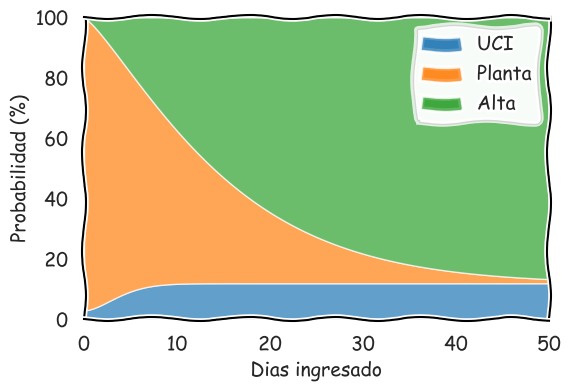

In [122]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys
import scipy
sys.path.append('../src')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


from covid_simulation.simulation.sim_filling import apply_maxcapacity_constraint, apply_maxcapacity_constraint_1d
from covid_simulation.simulation.utils import from_times_to_counts
from covid_simulation.distributions import weibull, weibull_pdf
from covid_simulation.simulation.distributions import PARAMS_PROB_UCI, hosp_to_uci_los_dist, hosp_los_dist

# PARAMS_HOSP_TO_UCI
# dist_host_to_uci,dist_host_to_alta

p_uci = PARAMS_PROB_UCI['p_uci']
p_uci_now_given_uci = PARAMS_PROB_UCI['p_uci_now_given_uci']




x = np.linspace(0,50,100)
p_alta_x = (1-p_uci)*hosp_los_dist.cdf(x)
p_uci_x = p_uci*(p_uci_now_given_uci+((1-p_uci_now_given_uci))*hosp_to_uci_los_dist.cdf(x) )
p_planta_x = 1-p_alta_x-p_uci_x

y0 = 0
y1 = 100*p_uci_x
y2 = 100*(1-p_alta_x)
y3 = 100
with plt.xkcd(scale=2):
    plt.figure(dpi=100)

    plt.fill_between(x,y0,y1, label='UCI', alpha=.7)
    plt.fill_between(x,y1,y2, label='Planta', alpha=.7)
    plt.fill_between(x,y2,y3, label='Alta', alpha=.7)
    plt.legend()
    plt.ylim(0,100)
    plt.xlim(0,50)
    plt.xlabel('Dias ingresado')
    plt.ylabel('Probabilidad (%)')

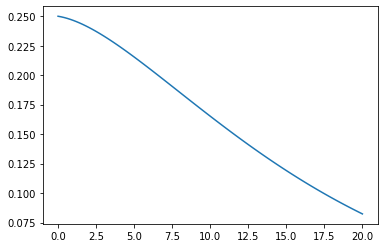

In [51]:
dist_c = scipy.stats.weibull_min(c=shape, scale=scale, loc=-x0)
n = np.exp(t0**shape)/t0**shape
plt.plot(x,n*dist_c.pdf(x), label='cond_scipy')

-4.977288990179054

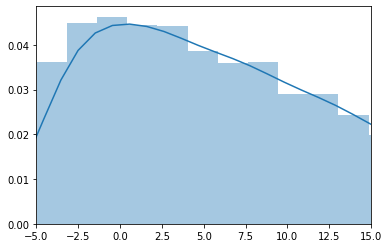

In [71]:
dist_c = scipy.stats.weibull_min(c=shape, scale=scale, loc=-x0)
samples = dist_c.rvs(size=(10000,))
sns.distplot(samples)
plt.xlim(-x0,3*x0)
samples.min()

0.18496535174247017

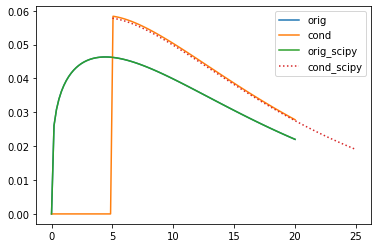

In [64]:
x0 = 5
t0 = x0/scale
plt.plot(x,weibull_pdf(x,scale, shape), label='orig')
plt.plot(x,weibull_pdf(x,scale, shape,x0), label='cond')

dist_o = scipy.stats.weibull_min(c=shape, scale=scale, )
plt.plot(x,dist_o.pdf(x), label='orig_scipy')

dist_c = scipy.stats.weibull_min(c=shape, scale=scale, loc=-x0)
n = 1.25#np.exp(t0**shape)/t0**shape
plt.plot(x+x0,n*dist_c.pdf(x), label='cond_scipy', linestyle=':')
plt.legend()
1/(np.exp(t0**shape)/t0**shape)

In [74]:
PARAMS_HOSP


{'scale': 16, 'c': 1.25}

In [79]:
def sample_np(scale, c, size = None):
    return scale*np.random.weibull(c, size=size)

def sample_scipy(scale, c, size=None):
    return scipy.stats.weibull_min.rvs(scale = scale,c=  c,size=size)

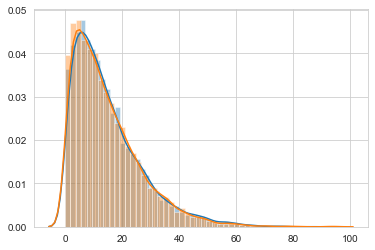

In [86]:
sns.distplot(sample_np(**PARAMS_HOSP, size=(100,100)).reshape((-1)))
sns.distplot(sample_scipy(**PARAMS_HOSP, size=(100,100)).reshape((-1)))

In [89]:
%%timeit
sample_scipy(**PARAMS_HOSP, size=(100,100))

605 µs ± 41.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [90]:
%%timeit
sample_np(**PARAMS_HOSP, size=(100,100))

624 µs ± 28.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


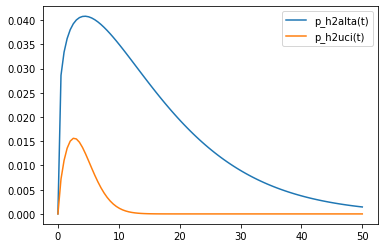

In [50]:



plt.plot(x,(1-p_uci)*dist_host_to_alta.pdf(x), label='p_h2alta(t)')
plt.plot(x,(p_uci*(1-p_uci_now_given_uci))*dist_host_to_uci.pdf(x), label='p_h2uci(t)')

plt.legend()

In [51]:
x = np.linspace(0,50,100)
p_alta = (1-p_uci)*dist_host_to_alta.cdf(x)
p_uci = p_uci*p_uci_now_given_uci+(p_uci*(1-p_uci_now_given_uci))*dist_host_to_uci.cdf(x)
plt.plot(x,p_alta, label='p_alta(t)')
plt.plot(x,p_uci, label='p_uci(t)')
plt.plot(x,1-p_alta-p_uci, label='p_planta(t)')
plt.legend()

In [54]:
sns.set_style("whitegrid")

Text(0, 0.5, 'Probabilidad (%)')

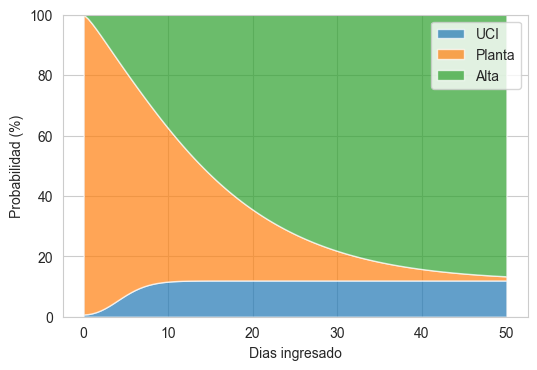

In [31]:



x = np.linspace(0,50,100)


p_uci_x = p_uci_conditioned(x, p_uci, dist_host_to_uci, dist_host_to_alta)
plt.plot(x,p_uci_x, label='p_uci(t)')
plt.plot(x,1-p_uci_x, label='p_alta(t)')
plt.plot(x,(1-p_uci)*dist_host_to_alta.cdf(x), label='p_h2alta(t)')
plt.plot(x,(p_uci)*dist_host_to_uci.cdf(x), label='p_h2uci(t)')
plt.axhline(p_uci,label='p_uci', alpha=.5, linestyle=':')
plt.legend()

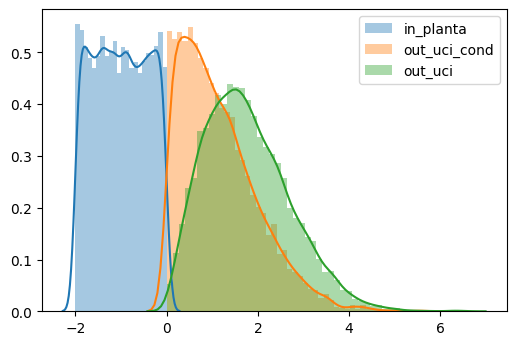

In [34]:
def propagate_times(times_in,t0=None, seed=0):
    '''
    
    **TODO:** 
    '''
    if t0 is None:
        t0 = np.NINF
    time_already = np.maximum(0,t0-times_in)
    params = {'scale':2, 'shape_a':2}
    delta_t = weibull(**params, x0=time_already,size=times_in.shape,seed=seed)
    times_out = times_in+delta_t
    return times_out


plt.figure(dpi=100)
times_in = np.random.uniform(-2,0,size=(10000,1))
times_out = propagate_times( times_in, 0)
sns.distplot(times_in,label='in_planta')
sns.distplot(times_out,label='out_uci_cond')
times_out = -times_in+propagate_times( times_in)
sns.distplot(times_out,label='out_uci')
plt.legend()

In [6]:
x = np.arange(0,7,1)
times_in = np.random.uniform(0,10,size=(80,13))
times_out = times_in + np.random.uniform(0,2, size = times_in.shape)

In [7]:
times_in

array([[9.23433303, 0.6277456 , 2.64440778, ..., 4.52849664, 8.3508793 ,
        8.74282145],
       [0.43745358, 1.17389206, 1.54176783, ..., 2.29585027, 3.59110855,
        5.75611113],
       [7.11762151, 4.71417494, 4.92431397, ..., 9.8903837 , 9.37535873,
        8.13019281],
       ...,
       [0.8690797 , 9.4982435 , 5.45203385, ..., 1.31327963, 3.33466039,
        6.68220967],
       [2.84615569, 4.63094637, 3.60784083, ..., 1.61481268, 7.96686636,
        9.40843888],
       [2.38532928, 2.55701312, 1.35745689, ..., 2.18119947, 9.98278013,
        1.92614866]])

In [3]:
test_arr = np.array([np.nan, np.inf, 2,3,4])
test_arr

array([nan, inf,  2.,  3.,  4.])

In [34]:
tc_in, tc_out = apply_maxcapacity_constraint(times_in,times_out, nmax=14, verbose=True)
cum_in = from_times_to_counts(x, tc_in)
cum_out = from_times_to_counts(x, tc_out)
actives = cum_in-cum_out
actives

100%|██████████| 4/4 [00:00<00:00, 1782.35it/s]

Number of saturated runs: 4 (30.77%)
Non saturated indices: [ 0  1  2  3  4  5  6  9 11]


array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  5,  7,  6,  9,  4,  5,  9,  1,  8,  4,  4,  8],
       [ 5,  9,  9,  9, 12,  7,  8, 11,  8,  9,  3,  9,  6],
       [10,  8,  8, 12,  9, 10,  8, 10, 14,  8,  7,  8,  5],
       [ 3,  8,  5,  7, 13,  9,  5,  6,  7,  6,  6, 10,  5],
       [ 8,  9, 11, 10,  7,  3,  9,  5,  4,  9,  9,  9, 12],
       [ 7,  8, 12,  9,  8,  7,  5,  7, 10,  8,  8, 11, 12]])

In [ ]:
test_arr.swapaxes()

In [6]:
np.isnan(test_arr)

array([ True, False, False, False, False])

In [7]:
np.isinf(test_arr)

array([False,  True, False, False, False])

In [14]:
mask = np.isfinite(test_arr)
mask

array([False, False,  True,  True,  True])

In [15]:
np.nonzero(mask)

(array([2, 3, 4]),)

In [9]:
np.nanmax(test_arr)

inf

In [10]:
np.amax(test_arr)

nan

(array([  2.,  21.,  73., 176., 264., 224., 164.,  54.,  18.,   4.]),
 array([-3.28383901, -2.62140275, -1.95896649, -1.29653023, -0.63409397,
         0.02834229,  0.69077855,  1.35321481,  2.01565107,  2.67808733,
         3.34052359]),
 <a list of 10 Patch objects>)

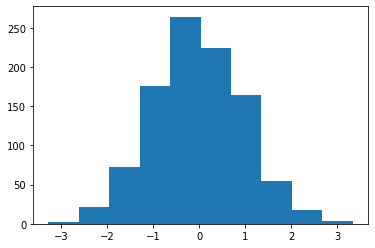

In [12]:
import matplotlib.pyplot as plt
plt.hist(np.random.normal(size=(1000,)))

In [5]:
test_arr > 3

/Users/danky/miniconda3/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


array([False,  True, False, False,  True])

In [22]:
from distributions import weibull_pdf

In [46]:
from inspect import signature, Parameter

<_ParameterKind.KEYWORD_ONLY: 3>

In [26]:
signature(weibull_pdf).parameters.keys()

odict_keys(['x', 'scale', 'shape_a', 'x0'])

In [52]:
signature(weibull_pdf).parameters['x'].default 

inspect._empty

In [57]:
signature(weibull_pdf).parameters['x0'].name

'x0'

In [58]:
x = np.linspace(0,200,10000)

In [63]:
%%timeit
x**(1/5.3)

236 µs ± 8.27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [64]:
%%timeit
np.power(x,(1/5.3))

236 µs ± 5.68 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## bed fillling algorithm

In [1]:
import numpy as np

In [65]:
import os
os.path.realpath(__file__)

NameError: name '__file__' is not defined

In [62]:
def apply_maxcapacity_constraint_1d(times_in, times_out, n0=0, nmax=None):
    """
    Correct times of entering and leaving applying saturation
    effects, i.e., that the room has a maximum cacity of nmax.

    Parameters
    ----------
    times_in : array-like
        shape : (max_people, )
        Array with entrance times of each person
    times_out : array-like
        shape : (max_people, )
        Array with leaving times of each person
    n0 : int, default=0
        People already in the room at the beginning
    nmax : int or None, default=None
        Maximum number of people

    Returns
    -------
    times_constrained_in : array-like
        shape : (max_people, )
        Array with entrance times of each person, corrected
    times_constrained_out : array-like
        shape : (max_people, )
        Array with leaving times of each person, corrected
    """
    times_in = np.asarray(times_in)
    times_out = np.asarray(times_out)
    assert times_in.ndim==1, '`times_in` must be 1 dimensional'
    assert times_in.shape == times_out.shape, '`times_in` and `times_out` must have same shape'
    assert np.isnan(times_in).sum() == np.isnan(times_out).sum()
    
    if nmax is None:
        return times_in, times_out
    else:
        assert n0 <= nmax

    npeople = times_in.size

    # we use two vectors to identify each event
    # event_times : time of event, mask_out : True if it goes out
    event_times = np.concatenate((times_in, times_out), axis=0)
    mask_out = np.ones(shape=(npeople * 2), dtype='bool')
    mask_out[:npeople] = False

    # we loop over the events in time order
    idx_sorted = np.argsort(event_times)

    # initialize variables
    nbeds = n0
    times_constrained_in = times_in.copy()
    times_constrained_out = times_out.copy()
    idx_person_no_enter = set()
    for idx_event, is_out, time in zip(idx_sorted, mask_out[idx_sorted],
                                       event_times[idx_sorted]):
        # translate event index into person index
        if is_out:
            idx_person = idx_event - npeople
        else:
            idx_person = idx_event
        # want to enter
        if not is_out:
            # enters
            if nbeds < nmax:
                nbeds += 1
            # not enters
            else:
                idx_person_no_enter.add(idx_person)
                times_constrained_in[idx_person] = np.nan
                times_constrained_out[idx_person] = np.nan
        # wants to leave
        else:
            # if a person has not entered, it cannot leave
            if idx_person in idx_person_no_enter:
                continue
            else:
                nbeds -= 1

    assert times_constrained_in.shape == times_in.shape
    assert times_constrained_out.shape == times_out.shape
    # the number of people must be the same for entering and leaving
    assert np.isnan(times_constrained_in).sum() == np.isnan(
        times_constrained_out).sum()
    # after applying the constraing, less or equal people can enter
    n_original = np.isnan(times_constrained_in).sum()
    n_constrained = np.isnan(times_in).sum()
    assert n_original >= n_constrained
    return times_constrained_in, times_constrained_out


print(cum(x, times_in) - cum(x, times_out))
times_constrained_in, times_constrained_out = apply_maxcapacity_constraint_1d(
    times_in, times_out, n0=0, nmax=4)
print(cum(x, times_constrained_in) - cum(x, times_constrained_out))

[0 3 2 1 3 2 1 3 1 2 1]
[0 3 2 1 3 2 1 2 1 2 1]


/Users/danky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  


In [45]:
def cum(x,times_in):
    return (np.expand_dims(times_in, 1)<=x).sum(axis=0)

In [59]:
times_in = np.random.uniform(0,10,size=(40,))
times_in[3] = np.nan
times_out = times_in+np.random.uniform(0,1,size=(40,))

x = np.arange(0,11,1).reshape((1,-1))

In [61]:
print(cum(x, times_in) - cum(x, times_out))
times_constrained_in, times_constrained_out = apply_maxcapacity_constraint_1d(
    times_in, times_out, n0=0, nmax=4)
print(cum(x, times_constrained_in) - cum(x, times_constrained_out))

[0 3 2 1 3 2 1 3 1 2 1]
[0 3 2 1 3 2 1 2 1 2 1]


/Users/danky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  


In [18]:
idx_order = np.argsort(times_in)

In [19]:
times_in[idx_order]

array([0.33723722, 0.39438485, 0.52574341, 0.73101816, 0.98639643,
       1.28313196, 1.70470142, 1.73950673, 1.79336673, 1.95674686,
       2.08319209, 2.65079331, 2.79895474, 2.86830686, 3.01235401,
       3.13388026, 3.54850855, 3.66643074, 3.72916944, 4.18479642,
       4.7334951 , 4.79482404, 4.91738037, 5.03354962, 5.20359748,
       5.61971496, 5.62618015, 5.78435711, 5.95193354, 6.82570998,
       6.99943354, 7.02392698, 7.44788814, 7.74155391, 8.00944419,
       8.78219789, 9.22626352, 9.37725798, 9.54114128, 9.63406933])

In [30]:
np.random.binomial(1, p=[0.5,0.9], size=(10,2))

array([[1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1]])

In [32]:
hosp_to_uci_los_dist

In [65]:
PARAMS_PROB_UCI['p_uci']

0.12

In [110]:
from covid_simulation.simulation.distributions import (hosp_los_dist,
                                                       hosp_to_uci_los_dist,
                                                       PARAMS_PROB_UCI,
                                                      PARAMS_HOSP,
                                                      PARAMS_HOSP_TO_UCI)
from covid_simulation.distributions import weibull


def p_uci_conditioned(t0):
    p_uci_0 = PARAMS_PROB_UCI['p_uci']
    pbar_uci_now_g_uci = 1 - PARAMS_PROB_UCI['p_uci_now_given_uci']

    p_uci_inv = 1 + ((1 - p_uci_0) / (p_uci_0)) * (hosp_los_dist.sf(t0)) / (
        pbar_uci_now_g_uci * hosp_to_uci_los_dist.sf(t0))
    p_uci = 1 / p_uci_inv

    # we need to include the delta at t0=0
    if isinstance(t0, np.ndarray):
        p_uci[t0 == 0] = p_uci_0
    elif t0 == 0:
        p_uci = p_uci_0

    return p_uci

def mask_uci_conditioned(t0):
    p_uci = p_uci_conditioned(t0)
    mask = np.random.binomial(1,p_uci, size=p_uci.shape).astype('bool')
    return mask

# def propagate_times_conditioned(t0, seed = 0):
#     mask_uci = mask_uci_conditioned(t0)
#     times_uci = np.ones_like(t0)*np.nan
#     times_uci[mask_uci] = t0[mask_uci] + hosp_to_uci_los_dist.rvs(size=times_uci[mask_uci].shape)
#     times_alta = np.ones_like(t0)*np.nan
#     times_alta[~mask_uci] = t0[~mask_uci] + hosp_los_dist.rvs(size=times_alta[~mask_uci].shape)
#     return times_alta,times_uci

def propagate_times_conditioned(t0, seed = 0):
    mask_uci = mask_uci_conditioned(t0)
    times_uci = np.ones_like(t0)*np.nan
    scale, shape = PARAMS_HOSP_TO_UCI['scale'], PARAMS_HOSP_TO_UCI['shape']
    times_uci[mask_uci] =  weibull(scale, shape,x0=t0[mask_uci], size=times_uci[mask_uci].shape)
    times_alta = np.ones_like(t0)*np.nan
    scale, shape = PARAMS_HOSP['scale'], PARAMS_HOSP['shape']
    times_alta[~mask_uci] = weibull(scale, shape,x0=t0[~mask_uci],size=times_alta[~mask_uci].shape)
    return times_alta,times_uci
    


mask_uci_conditioned(times).mean()

0.0707

In [112]:
np.isfinite(times_alta).mean()

0.9294

In [113]:
np.isfinite(times_uci).mean()

0.0706

In [94]:
from covid_simulation.simulation.utils import from_times_to_counts

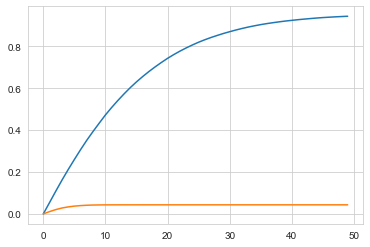

In [128]:
times = np.random.uniform(0,10,size=(3000,50))


times_alta,times_uci = propagate_times_conditioned(times)

x = np.arange(0,50,1)

count_altas = from_times_to_counts(x,times_alta-times).mean(axis=1)/times.shape[0]
count_ucis = from_times_to_counts(x,times_uci-times).mean(axis=1)/times.shape[0]

plt.plot(x,count_altas)
plt.plot(x,count_ucis)

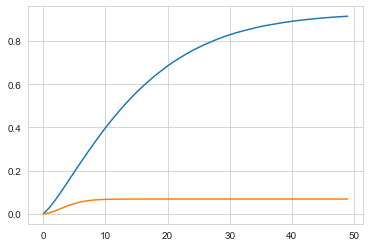

In [104]:
x = np.arange(0,50,1)

count_altas = from_times_to_counts(x,times_alta-times).mean(axis=1)/times.shape[0]
count_ucis = from_times_to_counts(x,times_uci-times).mean(axis=1)/times.shape[0]

plt.plot(x,count_altas)
plt.plot(x,count_ucis)

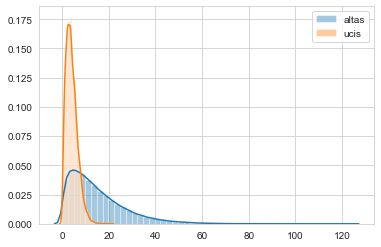

In [96]:
sns.distplot((times_alta-times).flatten(), label='altas')
sns.distplot((times_uci-times).flatten(), label='ucis')
plt.legend()

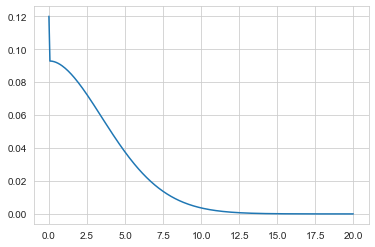

In [71]:
x = np.linspace(0,20,300)
y = p_uci_conditioned(x)
plt.plot(x,y)

In [50]:
p_uci*(1-p_uci_now_given_uci)

0.09

In [54]:
(p_uci*(1-p_uci_now_given_uci))/(1-p_uci_now_given_uci*(p_uci))

0.09278350515463918

In [58]:
p_uci_conditioned(0.000000001)/((p_uci*(1-p_uci_now_given_uci))/(1-p_uci_now_given_uci*(p_uci)))

1.0000000000001592